In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utilities import get_git_repo_path, log_bin

# Setup
git_path = get_git_repo_path()
all_temperatures = np.array([0.8, 1.0, 1.2, 1.5, 1.8, 2.2, 2.6, 3.0])
target_frequency = 150929  # MHz
ref_time = 463.7943 # LJ time in fs
ref_temp = 50.3219 # LJ temp in K

In [30]:

# Output containers
R1_at_target = []
R2_at_target = []
Gij_in_zero = []
R1_spectra = []
R2_spectra = []
correlation_functions = []

# Read data
for T in all_temperatures:
    result_file = f"T{T}/result.npy"
    
    if not os.path.exists(result_file):
        print(f"Warning: Missing result file for T={T}")
        continue

    data = np.load(result_file, allow_pickle=True).item()
    
    time_vector = np.real(data["t"])
    freq_vector = np.real(data["f"])
    idx_closest = np.argmin(np.abs(freq_vector - target_frequency))

    correlation_functions.append(data["C"])
    R1_spectra.append(data["R1"])
    R2_spectra.append(data["R2"])

    _, R1_spectra_log = log_bin(freq_vector[1:], R1_spectra[-1][1:], num_bins = 200)
    freq_vector_log, R2_spectra_log = log_bin(freq_vector[1:], R2_spectra[-1][1:], num_bins = 200)
    time_vector_log, correlation_function_log = log_bin(time_vector[1:], correlation_functions[-1][1:], num_bins = 200)
    np.savetxt(f"T{T}/R1_vs_f.dat", np.vstack([freq_vector_log, R1_spectra_log]).T)
    np.savetxt(f"T{T}/R2_vs_f.dat", np.vstack([freq_vector_log, R2_spectra_log]).T)
    np.savetxt(f"T{T}/Gij_vs_t.dat", np.vstack([time_vector_log, correlation_function_log]).T)

    R1_at_target.append(data["R1"][idx_closest])
    R2_at_target.append(data["R2"][idx_closest])
    Gij_in_zero.append(data["C"][0])

R1_at_target = np.array(R1_at_target)
R2_at_target = np.array(R2_at_target)
Gij_in_zero = np.array(Gij_in_zero)

np.savetxt("R1_vs_temperature.dat", np.vstack([all_temperatures, R1_at_target]).T)
np.savetxt("R2_vs_temperature.dat", np.vstack([all_temperatures, R2_at_target]).T)
np.savetxt("Gij_vs_temperature.dat", np.vstack([all_temperatures, Gij_in_zero]).T)

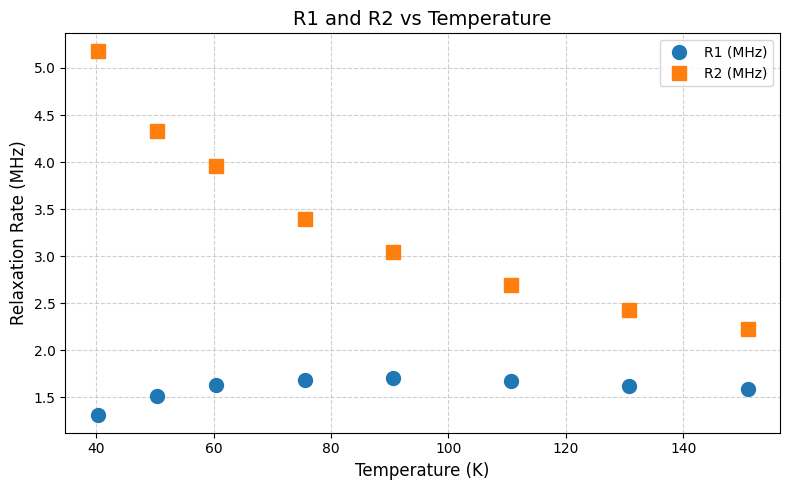

In [ ]:
scaled_T = all_temperatures * ref_temp

plt.figure(figsize=(8, 5))
plt.plot(scaled_T, np.array(R1_at_target) * 1000, "o", label="R1 (MHz)", markersize = 10)
plt.plot(scaled_T, np.array(R2_at_target) * 1000, "s", label="R2 (MHz)", markersize = 10)

plt.xlabel("Temperature (K)", fontsize=12)
plt.ylabel("Relaxation Rate (MHz)", fontsize=12)
plt.title("R1 and R2 vs Temperature", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("relaxation_vs_temperature.png", dpi=300)
plt.show()

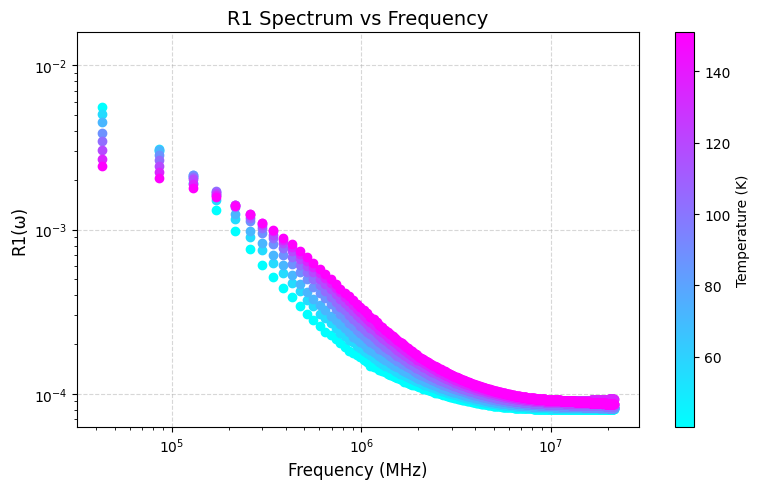

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

# Colormap and color assignment
cmap = plt.cm.cool
colors = cmap(np.linspace(0, 1, len(R1_spectra)))

# Plot each R1 spectrum
for i, (R1_spectrum, color) in enumerate(zip(R1_spectra, colors)):
    ax.loglog(freq_vector, R1_spectrum, "o", label=f"T = {all_temperatures[i]*ref_temp:.1f} K", color=color)

# Axis labels and title
ax.set_xlabel("Frequency (MHz)", fontsize=12)
ax.set_ylabel("R1(ω)", fontsize=12)
ax.set_title("R1 Spectrum vs Frequency", fontsize=14)
ax.grid(True, linestyle="--", alpha=0.5)

# Colorbar representing temperature gradient
norm = plt.Normalize(vmin=all_temperatures[0]*ref_temp, vmax=all_temperatures[-1]*ref_temp)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax, label="Temperature (K)")

plt.tight_layout()
plt.savefig("R1_spectrum.png", dpi=300)
plt.show()

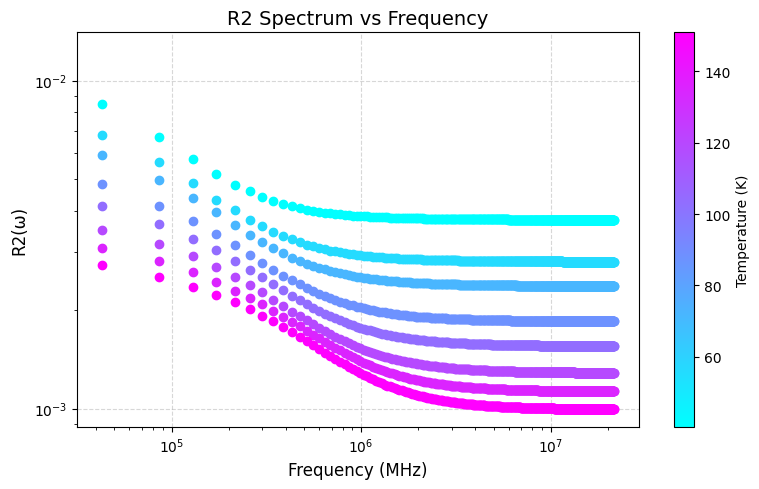

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))

# Colormap and color assignment
cmap = plt.cm.cool
colors = cmap(np.linspace(0, 1, len(R2_spectra)))

# Plot each R1 spectrum
for i, (R2_spectrum, color) in enumerate(zip(R2_spectra, colors)):
    ax.loglog(freq_vector, R2_spectrum, "o", label=f"T = {all_temperatures[i]*ref_temp:.1f} K", color=color)

# Axis labels and title
ax.set_xlabel("Frequency (MHz)", fontsize=12)
ax.set_ylabel("R2(ω)", fontsize=12)
ax.set_title("R2 Spectrum vs Frequency", fontsize=14)
ax.grid(True, linestyle="--", alpha=0.5)

# Colorbar representing temperature gradient
norm = plt.Normalize(vmin=all_temperatures[0]*ref_temp, vmax=all_temperatures[-1]*ref_temp)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax, label="Temperature (K)")

plt.tight_layout()
plt.savefig("R2_spectrum.png", dpi=300)
plt.show()

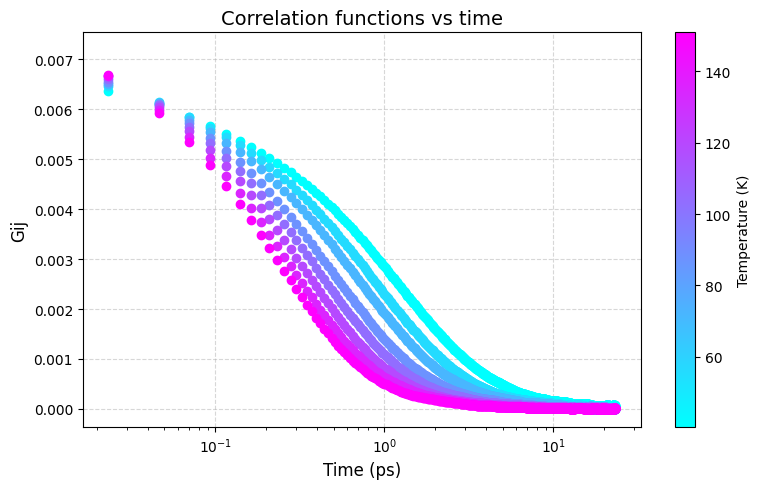

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))

# Colormap and color assignment
cmap = plt.cm.cool
colors = cmap(np.linspace(0, 1, len(R1_spectra)))

# Plot each R1 spectrum
for i, (correlation_function, color) in enumerate(zip(correlation_functions, colors)):
    ax.semilogx(time_vector, correlation_function, "o", label=f"T = {all_temperatures[i]*ref_temp:.1f} K", color=color)

# Axis labels and title
ax.set_xlabel("Time (ps)", fontsize=12)
ax.set_ylabel("Gij", fontsize=12)
ax.set_title("Correlation functions vs time", fontsize=14)
ax.grid(True, linestyle="--", alpha=0.5)

# Colorbar representing temperature gradient
norm = plt.Normalize(vmin=all_temperatures[0]*ref_temp, vmax=all_temperatures[-1]*ref_temp)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax, label="Temperature (K)")

plt.tight_layout()
plt.savefig("correlation_functions.png", dpi=300)
plt.show()